数据探索性分析与数据预处理

姓名：曾颖波

学号：3120230950

学院：计算机学院


1 对GitHub Dataset的版本一数据集进行处理

1.1 数据摘要和可视化

1.1.1数据摘要

（1）标称属性： 标称属性，给出每个可能取值的频数，包括repositories项目仓库名称、language编程语言

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

def loader():   #读取数据
    filepath ="./datasets/GitHubDataset/github_dataset.csv" #使用的数据集文件地址
    df = pd.read_csv(filepath, header=0)
    return df

def count(str,data): #输出标称数据频数
    return data[str].value_counts()

df = loader()
nominal_attribute_list = ["repositories", "language"]

for attribute in nominal_attribute_list:
    print(attribute, "的频数：")
    print(count(attribute, df), "\n")

repositories 的频数：
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64 

language 的频数：
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#      

从输出结果可以看出两个结论：

·repositories项目名称存在多个重复项目

·language编程语言使用频率前三依次是JavaScript,Python,HTML

(2)数值属性：数值属性，给出5数概括及缺失值的个数，包括stars_count标星数量, forks_count, issues_count, pull_requests, contributors贡献者人数

In [2]:
def fiveNumberandnull(str,data): #输出数值数据5数概括及缺失值的个数
    nums = data[str]

    # 缺失值的个数
    nullnum = nums.isnull().sum()
    print("缺省值null个数:%d"%(nullnum))

    # 五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）
    nums = nums.dropna(axis = 0) #删除NaN值
    Minimum = min(nums)
    Maximum = max(nums)
    Q1 = np.percentile(nums, 25)
    Median = np.median(nums)
    Q3 = np.percentile(nums, 75)
    print("Minimum:", Minimum)
    print("Q1:", Q1)
    print("Median:", Median)
    print("Q3:", Q3)
    print("Maximum:",Maximum)

numerical_attributes_list = ["stars_count", "forks_count", "issues_count", "pull_requests", "contributors"]

for attribute in numerical_attributes_list:
    print(attribute, ":")
    print(fiveNumberandnull(attribute, df), "\n")

stars_count :
缺省值null个数:0
Minimum: 0
Q1: 1.0
Median: 12.0
Q3: 65.25
Maximum: 995
None 

forks_count :
缺省值null个数:0
Minimum: 0
Q1: 1.0
Median: 6.0
Q3: 38.25
Maximum: 973
None 

issues_count :
缺省值null个数:0
Minimum: 1
Q1: 1.0
Median: 2.0
Q3: 6.0
Maximum: 612
None 

pull_requests :
缺省值null个数:0
Minimum: 0
Q1: 0.0
Median: 0.0
Q3: 2.0
Maximum: 567
None 

contributors :
缺省值null个数:0
Minimum: 0
Q1: 0.0
Median: 2.0
Q3: 4.0
Maximum: 658
None 



从上面输出结果可以看出，stars_count标星数量、forks_count、issues_count、pull_requests、contributors贡献者人数都没有缺省值

1.1.2 数据可视化

使用直方图、盒图等检查数据分布及离群点

stars_count 的直方图、盒图：


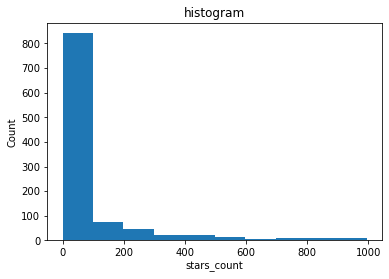

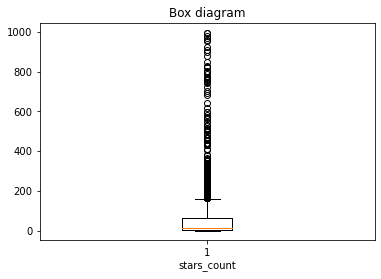

forks_count 的直方图、盒图：


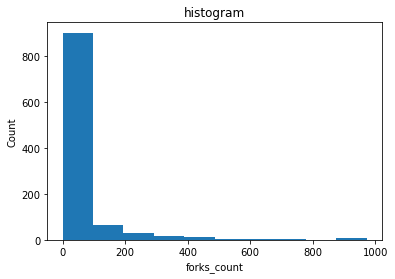

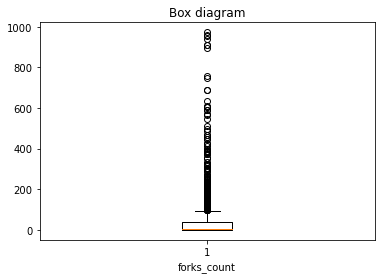

issues_count 的直方图、盒图：


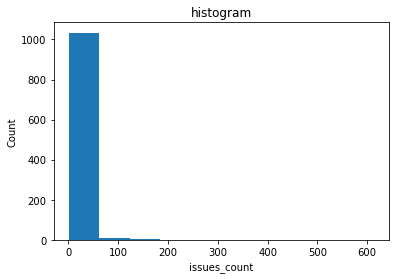

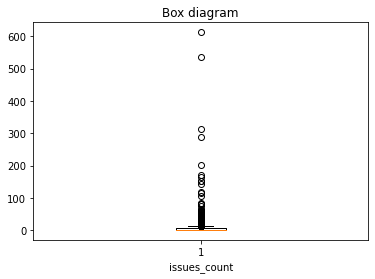

pull_requests 的直方图、盒图：


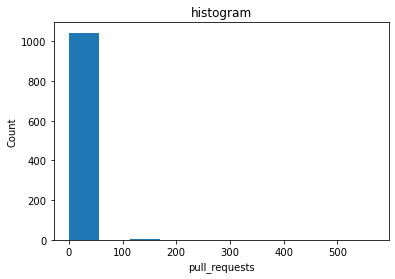

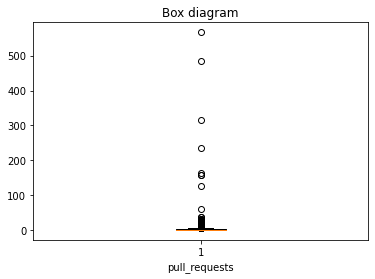

contributors 的直方图、盒图：


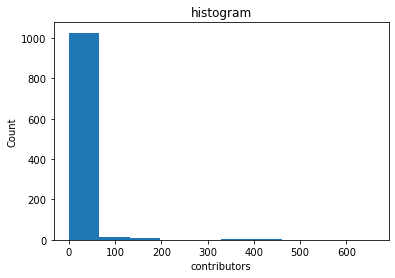

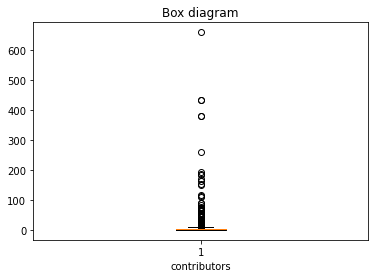

In [3]:
import matplotlib.pyplot as plt

numerical_attributes_list = ["stars_count", "forks_count", "issues_count", "pull_requests", "contributors"]
for attribute in numerical_attributes_list:
    print(attribute, "的直方图、盒图：")
    plt.hist(df[attribute])
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.title('histogram')
    plt.show()

    plt.boxplot(df[attribute])
    plt.xlabel(attribute)
    plt.title('Box diagram')
    plt.show()


从上面输出可以看出：

·stars_count标星数量大部分位于0-100，少量项目stars高于200

·forks_count大部分位于0-100

·issues_count大部分位于0-50

·pull_requests大部分位于0-50

·contributors贡献者人数大部分位于0-50

1.2 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

·将缺失部分剔除

·用最高频率值来填补缺失值


注意：在处理后完成，要对比新旧数据集的差异。





经过统计，在这个数据集中，只有编程语言language存在缺失数据的现象

In [4]:
# 统计缺失值数量
data = df['language']
null_num = data.isnull().sum()
print("编程语言language中的缺失值数量： ", null_num, "\n")

# 统计频数
counts = data.value_counts()
print(counts)

编程语言language中的缺失值数量：  145 

JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML         

处理方法一：将缺失部分剔除

In [5]:
#将缺失部分剔除；
data_dele = data.dropna()
print("处理方法一：将缺失部分剔除")
print("剔除缺失值前的数据集⼤⼩: ",data.shape)
print("剔除缺失值后的数据集⼤⼩: ", data_dele.shape)
print("剔除缺失值后缺失值统计：", data_dele.isnull().sum())



处理方法一：将缺失部分剔除
剔除缺失值前的数据集⼤⼩:  (1052,)
剔除缺失值后的数据集⼤⼩:  (907,)
将缺失部分剔除后缺失值统计： 0


处理方法二：用最高频率值来填补缺失值

In [6]:
data_upda = data.fillna("JavaScript")
print("处理方法二：用最高频率值来填补缺失值")
print("替换缺失值前的数据集⼤⼩: ",data.shape)
print("替换缺失值后的数据集⼤⼩: ", data_upda.shape)
print("将缺失部分剔除后缺失值统计：", data_upda.isnull().sum(), "个")
counts = data.value_counts()
counts_upda = data_upda.value_counts()
print("替换缺失值前频数统计\n", counts, "\n")
print("替换缺失值后频数统计\n", counts_upda, "\n")

替换缺失值前的数据集⼤⼩:  (1052,)
替换缺失值后的数据集⼤⼩:  (1052,)
将缺失部分剔除后缺失值统计： 0 个
替换缺失值前频数统计
 JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz         

2 对MovieLens 10M Dataset数据集进行处理

2.1 数据摘要和可视化

2.1.1数据摘要

（1）标称属性： 标称属性，给出每个可能取值的频数，包括电影名称title、电影类型genres、用户编码userID、评价标签tag

In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame

def loader():   #读取数据
    filepath ="./datasets/MovieLens_10M_Dataset" #使用的数据集文件地址
    movies_df = pd.read_csv( filepath + "/movies.dat", sep='::', names=['movieId', 'title', 'genres'], engine='python')
    ratings_df = pd.read_csv(filepath + "/ratings.dat", sep='::', names=['userId', 'movieId', 'rating', 'timestamp'], engine='python')
    tags_df = pd.read_csv(filepath + "/tags.dat", sep='::', names=['userId', 'movieId', 'tag', 'timestamp'], engine='python')
    return movies_df, ratings_df, tags_df

def count(str,data): #输出标称属性频数
    return data[str].value_counts()

movies_df, ratings_df, tags_df = loader()

In [8]:
# 电影名称
print('电影名称频数统计: \n', count('title', movies_df))

电影名称频数统计: 
 War of the Worlds (2005)                                                2
Last Tycoon, The (1976)                                                 1
Money for Nothing (1993)                                                1
Silencers, The (1966)                                                   1
Where Angels Go, Trouble Follows (1968)                                 1
                                                                       ..
Anguish (Angustia) (1987)                                               1
Blood Spattered Bride, The (La Novia Ensangrentada) (1972)              1
City of the Living Dead (Paura nella città dei morti viventi) (1980)    1
Endless Summer, The (1966)                                              1
Blackadder Back & Forth (1999)                                          1
Name: title, Length: 10680, dtype: int64


从输出结果可以看出，只有War of the Worlds (2005)存在重复，其他均无重复

In [9]:
# 电影类型数据摘要
genres = movies_df['genres'].str.split('|', expand=True).unstack().dropna()
print('电影类型: \n', genres.value_counts())

电影类型: 
 Drama                 5339
Comedy                3703
Thriller              1706
Romance               1685
Action                1473
Crime                 1118
Adventure             1025
Horror                1013
Sci-Fi                 754
Fantasy                543
Children               528
War                    511
Mystery                509
Documentary            482
Musical                436
Animation              286
Western                275
Film-Noir              148
IMAX                    29
(no genres listed)       1
dtype: int64


从输出结果可以看出，数据集中电影类型数量排列前三的依次是Drama、Comedy、Thriller,还有一部电影未列出电影类型

In [10]:
# 用户ID
print('评分表里用户ID频数统计: \n', count('userId', ratings_df))
print()
print('标签表里用户ID频数统计: \n', count('userId', tags_df))

评分表里用户ID频数统计: 
 59269    7359
67385    7047
14463    5169
68259    4483
27468    4449
         ... 
8773       20
54021      20
8789       20
12650      20
16401      20
Name: userId, Length: 69878, dtype: int64

标签表里用户ID频数统计: 
 10555    6012
23388    5811
23172    4034
33384    3632
52723    1747
         ... 
35568       1
35553       1
35543       1
35462       1
35438       1
Name: userId, Length: 4009, dtype: int64


In [11]:
print('标签tag频数统计: \n', count('tag', tags_df))

标签tag频数统计: 
 Tumey's DVDs                    641
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: tag, Length: 16528, dtype: int64


从输出结果可以看出，数据集中电影标签tag频数排列前三的依次是Tumey's DVDs、classic、based on a book

(2)数值属性：数值属性，给出5数概括及缺失值的个数，包括rating打分、timestamp时间戳

In [12]:
def fiveNumberandnull(str,data): #输出数值数据5数概括及缺失值的个数
    nums = data[str]

    # 缺失值的个数
    nullnum = nums.isnull().sum()
    print("缺省值null个数:%d"%(nullnum))

    # 五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）
    nums = nums.dropna(axis = 0) #删除NaN值
    Minimum = min(nums)
    Maximum = max(nums)
    Q1 = np.percentile(nums, 25)
    Median = np.median(nums)
    Q3 = np.percentile(nums, 75)
    print("Minimum:", Minimum)
    print("Q1:", Q1)
    print("Median:", Median)
    print("Q3:", Q3)
    print("Maximum:",Maximum)

print("评分rating:")
fiveNumberandnull("rating", ratings_df)

评分rating:
缺省值null个数:0


Minimum: 0.5
Q1: 3.0
Median: 4.0
Q3: 4.0
Maximum: 5.0


In [13]:
print("时间戳timestamp:")
fiveNumberandnull("timestamp", ratings_df)

时间戳timestamp:
缺省值null个数:0
Minimum: 789652009
Q1: 946765880.0
Median: 1035476481.0
Q3: 1126749070.75
Maximum: 1231131736


从输出结果可以看出，评分rating、数据戳timestamp均没有缺省值

1.1.2 数据可视化

使用直方图、盒图等检查数据分布及离群点

这里主要对用户对电影的评分rating进行制作直方图、盒图分析数据分布

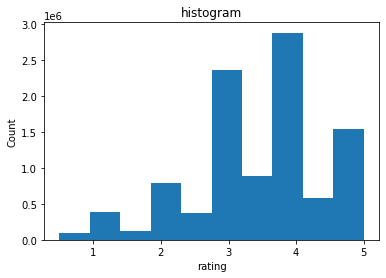

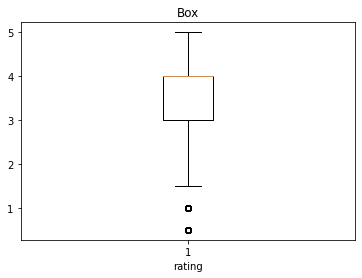

In [14]:
import matplotlib.pyplot as plt

plt.hist(ratings_df['rating'])
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('histogram')
plt.show()

plt.boxplot(ratings_df['rating'])
plt.xlabel('rating')
plt.title('Box')
plt.show()


从输出的直方图和盒图可以看出，用户评分rating大部分位于3-4的区间，另外评分低于2分的数量相对较少

1.2 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

·将缺失部分剔除

·用最高频率值来填补缺失值


注意：在处理后完成，要对比新旧数据集的差异。





经过统计，在这个数据集中，只有电影标签tag存在缺失数据的现象

In [15]:
# 统计缺失值数量
tag = tags_df['tag']
null_num = tag.isnull().sum()
print("tag中的缺失值数量： ", null_num, "\n")

# 统计频数
counts = tag.value_counts()
print(counts)

tag中的缺失值数量：  16 

Tumey's DVDs                    641
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: tag, Length: 16528, dtype: int64


处理方法一：将缺失部分剔除

In [16]:
#将缺失部分剔除；
tag_dele = tag.dropna()
print("处理方法一：将缺失部分剔除")
print("剔除缺失值前的数据集⼤⼩: ",tag.shape)
print("剔除缺失值后的数据集⼤⼩: ", tag_dele.shape)
print("将缺失部分剔除后缺失值统计：", tag_dele.isnull().sum())

处理方法一：将缺失部分剔除
剔除缺失值前的数据集⼤⼩:  (95580,)
剔除缺失值后的数据集⼤⼩:  (95564,)
将缺失部分剔除后缺失值统计： 0


处理方法二：用最高频率值来填补缺失值

In [17]:
tag_upda = tag.fillna("Tumey's DVDs")
print("替换缺失值前的数据集⼤⼩: ",tag.shape)
print("替换缺失值后的数据集⼤⼩: ", tag_upda.shape)
print("将缺失部分剔除后缺失值统计：", tag_upda.isnull().sum(), "个")
counts = tag.value_counts()
counts_upda = tag_upda.value_counts()
print("替换缺失值前频数统计\n", counts, "\n")
print("替换缺失值后频数统计\n", counts_upda, "\n")

替换缺失值前的数据集⼤⼩:  (95580,)
替换缺失值后的数据集⼤⼩:  (95580,)
将缺失部分剔除后缺失值统计： 0 个
替换缺失值前频数统计
 Tumey's DVDs                    641
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: tag, Length: 16528, dtype: int64 

替换缺失值后频数统计
 Tumey's DVDs                    657
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: tag, Length: 16528, dtype: int64 

